In [ ]:
%run markethistory_esi.py

In [10]:
!zcat < history-latest.csv.gz | head











zcat: error writing to output: Broken pipe


In [11]:
!zcat < invTypes.csv.bz2 | head











zcat: write: Broken pipe


In [12]:
!zcat < mapRegions.csv.bz2 | head -n 5

In [13]:
import pandas as pd

In [14]:
types = pd.read_csv('invTypes.csv.bz2', usecols=['typeID', 'typeName'], index_col='typeID')

In [15]:
types.dropna(inplace=True)
types

,typeName
typeID,
0,#System
2,Corporation
3,Region
4,Constellation
5,Solar System
6,Sun G5 (Yellow)
7,Sun K7 (Orange)
8,Sun K5 (Red Giant)
9,Sun B0 (Blue)


In [16]:
regions = pd.read_csv('mapRegions.csv.bz2', usecols=['regionID', 'regionName'], index_col='regionID')

In [17]:
regions

,regionName
regionID,
10000001,Derelik
10000002,The Forge
10000003,Vale of the Silent
10000004,UUA-F4
10000005,Detorid
10000006,Wicked Creek
10000007,Cache
10000008,Scalding Pass
10000009,Insmother


In [18]:
prices = pd.read_csv('history-latest.csv.gz', parse_dates=['date'])

In [19]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24589716 entries, 0 to 24589715
Data columns (total 9 columns):
type_id        int64
region_id      int64
date           datetime64[ns]
lowest         float64
highest        float64
average        float64
volume         int64
order_count    int64
revenue        float64
dtypes: datetime64[ns](1), float64(4), int64(4)
memory usage: 1.6 GB


In [18]:
prices['revenue'] = prices['average'] * prices['volume']

In [29]:
merged = pd.merge(prices, regions, how='left',
                  left_on='region_id', right_index=True)
merged = pd.merge(merged, types, how='left',
                  left_on='type_id', right_index=True)
merged.drop(['region_id', 'type_id'], axis=1, inplace=True)
merged

,date,lowest,highest,average,volume,order_count,revenue,regionName,typeName
0,2015-11-02T00:00:00Z,175900.00,175900.00,175900.00,1,1,175900.00,Derelik,Capacitor Management
1,2015-11-05T00:00:00Z,175850.47,346999.99,232900.31,3,3,698700.93,Derelik,Capacitor Management
2,2015-11-06T00:00:00Z,175800.93,175800.94,175800.94,4,4,703203.76,Derelik,Capacitor Management
3,2015-11-08T00:00:00Z,175800.94,175800.94,175800.94,1,1,175800.94,Derelik,Capacitor Management
4,2015-11-13T00:00:00Z,175800.93,175800.93,175800.93,1,1,175800.93,Derelik,Capacitor Management
5,2015-11-15T00:00:00Z,175800.93,175800.93,175800.93,1,1,175800.93,Derelik,Capacitor Management
6,2015-11-16T00:00:00Z,175800.94,175800.94,175800.94,1,1,175800.94,Derelik,Capacitor Management
7,2015-11-19T00:00:00Z,175800.93,175800.93,175800.93,1,1,175800.93,Derelik,Capacitor Management
8,2015-11-20T00:00:00Z,150000.00,150000.00,150000.00,1,1,150000.00,Derelik,Capacitor Management
9,2015-11-22T00:00:00Z,198999.99,198999.99,198999.99,1,1,198999.99,Derelik,Capacitor Management


In [52]:
print(prices.shape)
print(merged.shape)

(24589716, 8)
(24589716, 9)


In [46]:
pd.set_eng_float_format(accuracy=2, use_eng_prefix=True)

In [78]:
df = merged
df.head()

,date,lowest,highest,average,volume,order_count,revenue,regionName,typeName
0,2015-11-02T00:00:00Z,175.90k,175.90k,175.90k,1,1,175.90k,Derelik,Capacitor Management
1,2015-11-05T00:00:00Z,175.85k,347.00k,232.90k,3,3,698.70k,Derelik,Capacitor Management
2,2015-11-06T00:00:00Z,175.80k,175.80k,175.80k,4,4,703.20k,Derelik,Capacitor Management
3,2015-11-08T00:00:00Z,175.80k,175.80k,175.80k,1,1,175.80k,Derelik,Capacitor Management
4,2015-11-13T00:00:00Z,175.80k,175.80k,175.80k,1,1,175.80k,Derelik,Capacitor Management


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24589716 entries, 0 to 24589715
Data columns (total 9 columns):
date           object
lowest         float64
highest        float64
average        float64
volume         int64
order_count    int64
revenue        float64
regionName     object
typeName       object
dtypes: float64(4), int64(2), object(3)
memory usage: 1.6+ GB


In [74]:
df.describe()

,lowest,highest,average,volume,order_count,revenue
count,24.59M,24.59M,24.59M,24.59M,24.59M,24.59M
mean,21.98M,23.21M,22.62M,531.17k,12.65,364.47M
std,414.26M,416.77M,415.31M,57.39M,53.21,24.74G
min,10.00m,10.00m,10.00m,1.00,1.00,10.00m
25%,13.06k,28.00k,22.73k,2.00,1.00,480.00k
50%,320.00k,435.00k,395.28k,5.00,2.00,3.67M
75%,2.60M,3.00M,2.98M,40.00,7.00,29.68M
max,700.00G,700.00G,700.00G,39.22G,18.49k,23.95T


In [7]:
def esi_market_hist(type_id, region_id=10000002):
    url = 'https://esi.tech.ccp.is/latest/markets/{region_id}/history/?type_id={type_id}&datasource=tranquility'.format(
        region_id=region_id, type_id=type_id)
    df = pd.read_json(url).set_index('date')
    return df

In [8]:
import matplotlib as plt
%matplotlib inline
import seaborn as sns; sns.set()

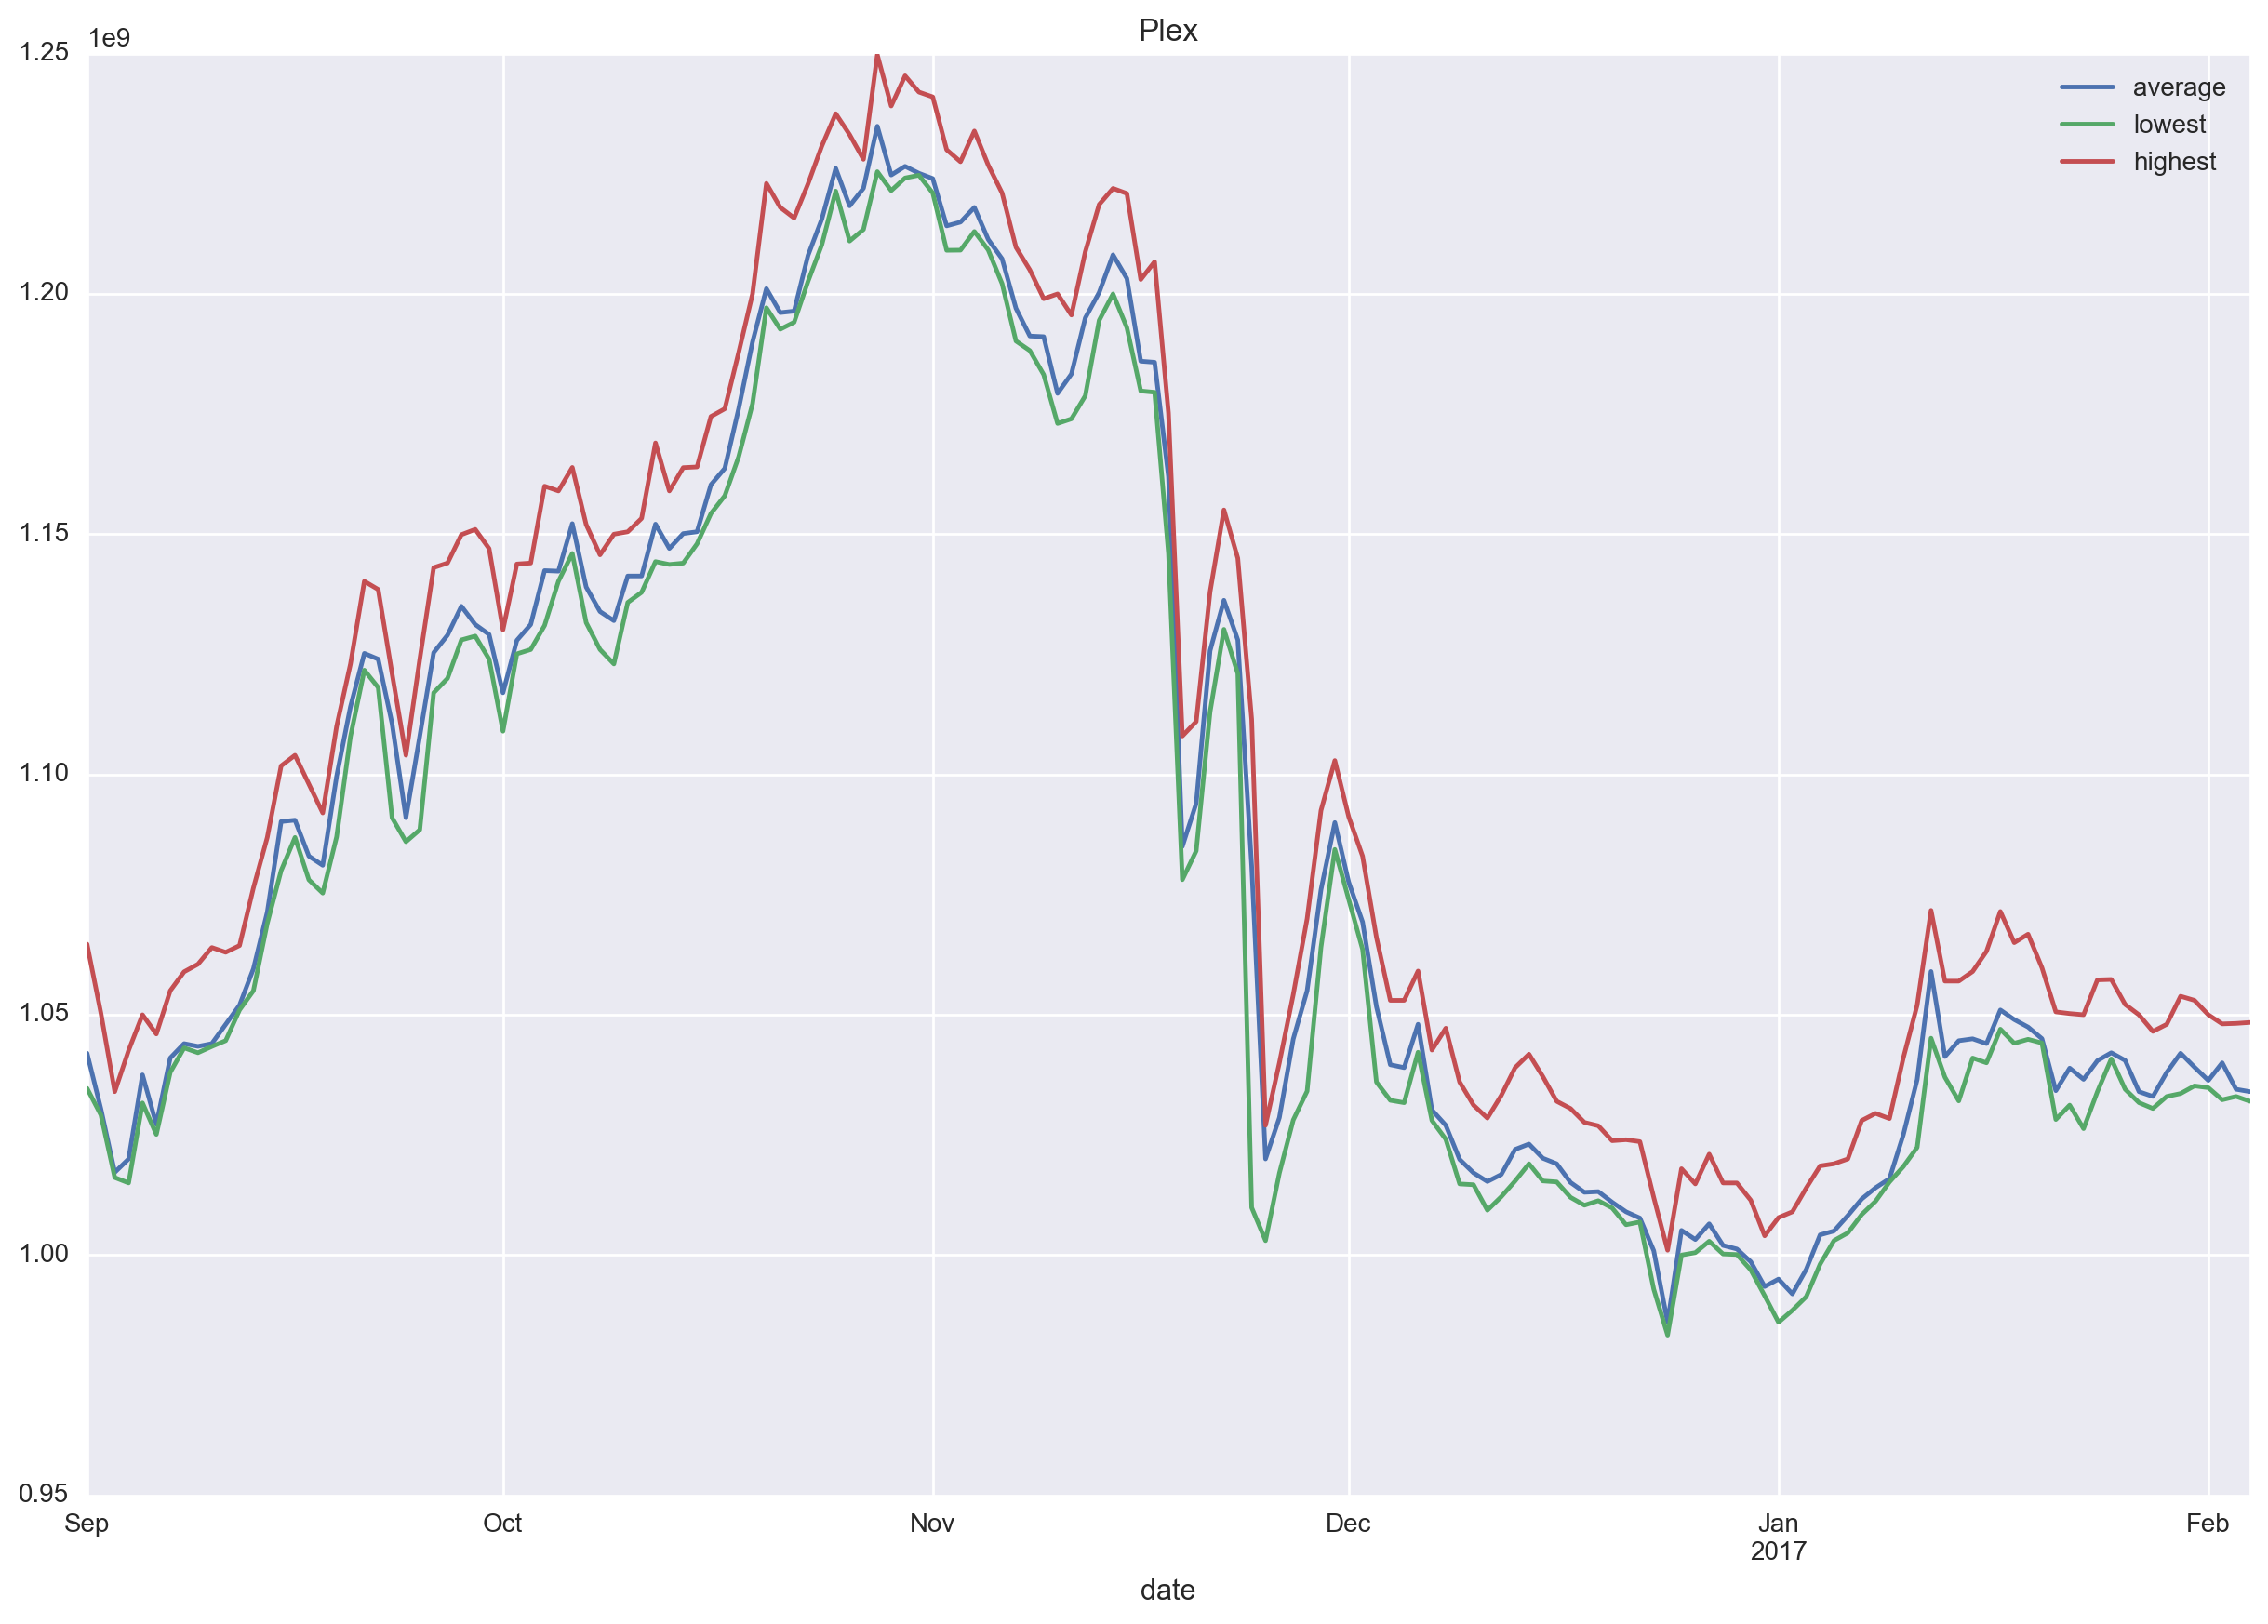

In [9]:
esi_market_hist(29668)['2016-09':][['average','lowest','highest']].plot(figsize=(15,10)).set_title('Plex');

In [64]:
df.sort_values(by='revenue', ascending=False).head(15)

,date,lowest,highest,average,volume,order_count,revenue,regionName,typeName
3003729,2016-02-09T00:00:00Z,644.30M,674.40M,657.20M,36443,18494,23.95T,The Forge,Skill Injector
3003730,2016-02-10T00:00:00Z,635.10M,657.11M,645.80M,33282,16297,21.49T,The Forge,Skill Injector
2435617,2016-02-09T00:00:00Z,1.26G,1.28G,1.27G,15345,7075,19.52T,The Forge,30 Day Pilot's License Extension (PLEX)
3003731,2016-02-11T00:00:00Z,631.10M,645.00M,640.00M,23189,10599,14.84T,The Forge,Skill Injector
2435618,2016-02-10T00:00:00Z,1.24G,1.28G,1.27G,10840,5514,13.75T,The Forge,30 Day Pilot's License Extension (PLEX)
3003734,2016-02-14T00:00:00Z,606.40M,621.90M,616.00M,22286,9116,13.73T,The Forge,Skill Injector
3003733,2016-02-13T00:00:00Z,609.80M,624.01M,619.90M,22002,10689,13.64T,The Forge,Skill Injector
3003732,2016-02-12T00:00:00Z,627.00M,641.90M,632.98M,21297,9914,13.48T,The Forge,Skill Injector
2435695,2016-04-27T00:00:00Z,983.00M,1.00G,991.80M,12234,3003,12.13T,The Forge,30 Day Pilot's License Extension (PLEX)
3003420,2016-02-09T00:00:00Z,304.01M,316.00M,308.90M,36362,11167,11.23T,The Forge,Skill Extractor


In [81]:
df.groupby('regionName')['revenue'].sum()

regionName
A-R00001                 85.76M
A-R00002                 600.00
A-R00003                 55.69G
Aridia                    7.99T
B-R00004                 75.76G
B-R00005                 21.04G
B-R00007                 60.64G
B-R00008                  6.36G
Black Rise               13.49T
Branch                   16.04T
C-R00011                 41.03M
C-R00012                  6.52G
C-R00014                  1.57G
Cache                   835.70G
Catch                    18.07T
Cloud Ring              466.75G
Cobalt Edge               5.53T
Curse                     6.86T
D-R00016                 89.72G
D-R00017                 48.97G
D-R00019                464.12G
D-R00020                 50.74G
D-R00021                199.09G
D-R00022                 90.50G
Deklein                  21.95T
Delve                    32.40T
Derelik                  14.12T
Detorid                   1.89T
Devoid                   11.36T
Domain                    1.01P
                         ... 

In [82]:
wh_regions = regions[regions.index >= 11000000]

In [102]:
df[df['regionName'].isin(wh_regions.regionName)].groupby(['regionName']).agg(
    {'volume': np.sum, 'revenue': ['sum', 'mean']})

revenue               volume
                sum     mean         sum
regionName                              
A-R00001     85.76M    9.53M       10023
A-R00002     600.00   600.00           6
A-R00003     55.69G  101.25M     4155491
B-R00004     75.76G   14.56M   302129617
B-R00005     21.04G    9.49M    76329945
B-R00007     60.64G   18.77M     1984186
B-R00008      6.36G   17.86M    19587488
C-R00011     41.03M    2.74M          41
C-R00012      6.52G   16.43M      143463
C-R00014      1.57G    5.47M     1433942
D-R00016     89.72G   15.99M    21600676
D-R00017     48.97G   57.14M     1491342
D-R00019    464.12G   44.62M   586884656
D-R00020     50.74G    9.86M     6736041
D-R00021    199.09G   27.83M    32146083
D-R00022     90.50G   23.25M    53024967
E-R00024     79.86G   25.30M   268177132
E-R00025    204.80G   28.61M   730443346
E-R00026    866.21M   33.32M       23840
E-R00027    126.19G   23.56M    40270626
E-R00028    144.15G   43.99M   115587087
E-R00029     12.67G   19.22M     8818068
F-R00030    261.58G   63.81M  1129250065
G-R00031    501.20G   12.01M   182481111